In [1]:
from variables import *
from utilities import fill_streams
from dsar import DSAR

In [2]:
dsars = {}
def main():
    dsar_bands: dict[str, list[float]] = {
        'HF' : [0.1, 8.0, 16.0],
        'LF' : [0.1, 4.5, 8.0],
    }
    
    # ============================================
    # Running DSAR per station
    for station in stations:
        dsars[station] = {}
        
        csv_files[station]: list[str] = []
        
        # Calculate DSAR per station per date
        for date in dates:
            date_string = date.strftime('%Y-%m-%d')
            
            # Save stream on a list of streams
            streams[date_string]: Stream = fill_streams(client, station, date)
            
            # Make sure stream is not empty
            if streams[date_string].count():
                
                # Run DSAR per day
                dsars[station][date_string] = DSAR(streams[date_string], bands = dsar_bands, resample = resample_rule)
                dsars[station][date_string].save()
                
        DSAR.concatenate_csv(dsar_directory, station, resample=resample_rule)
                

In [3]:
# main()

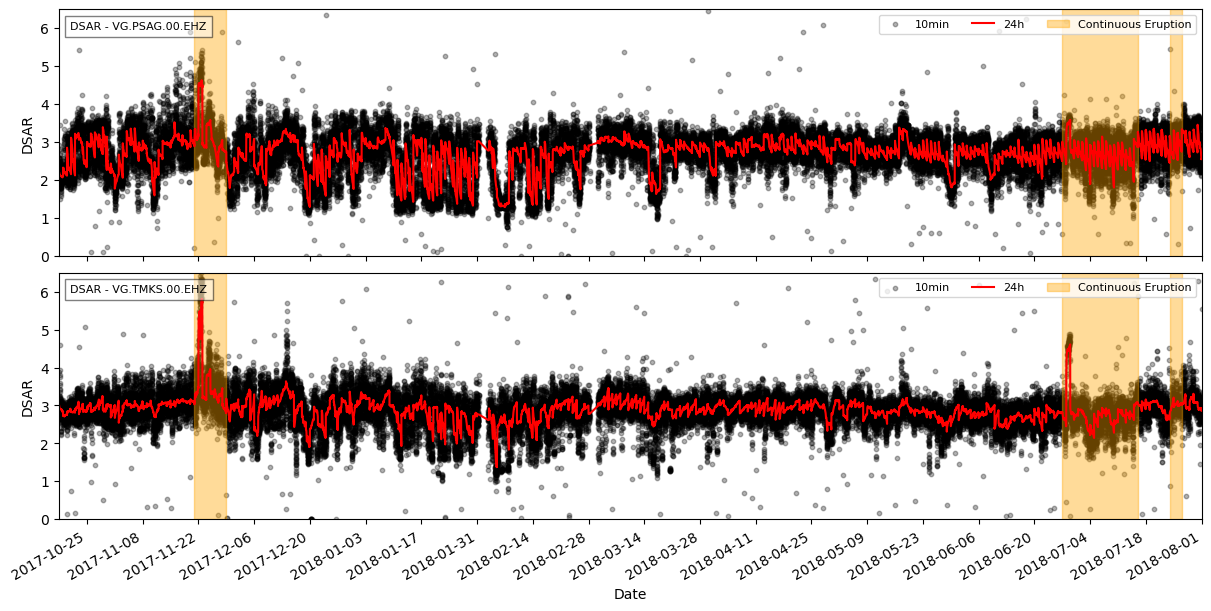

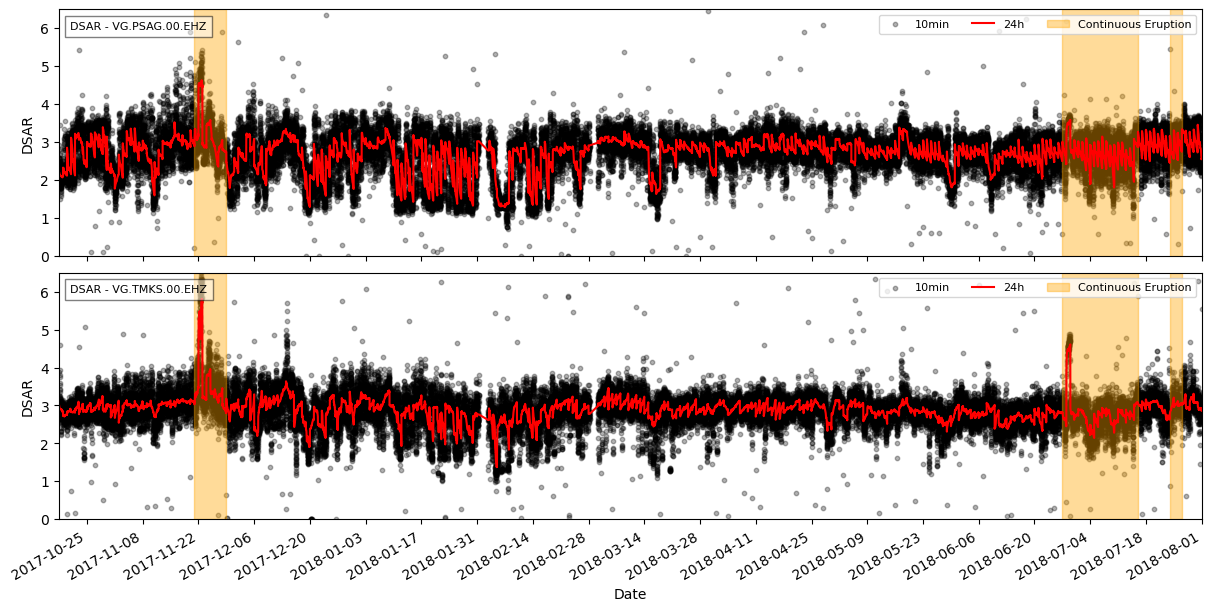

In [4]:
DSAR.plot(dsar_directory, stations, resample=resample_rule,
          axvspans=continuous_eruptions)